## Efton's Bootstrap and the Bayesian Bootstrap
_Bryan Graham_
_University of California at Berkeley_  
_February 2025_
<br>
<br>
#### Code citation:
<br>
Graham, Bryan S. (2019). "The Bayesian/Weighted Bootstrap Python Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 27 May 2019)
<br>
<br>

In [50]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [51]:
# Directory where NLSY97 data file is located
data     =  '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Data/'
graphics = '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/MaCSS/Graphics/'

In [52]:
# Read in NLSY97 Extract
nlsy97 = pd.read_csv(data+'nlsy97ss.csv') # Reading .csv as DataFrame

# Hierarchical index: household, then individual; keep indices as columns too
nlsy97.set_index(['hhid97','pid97'], drop=False, inplace=True)

# Display the first few rows of the dataframe
nlsy97.head()

hhid97  pid97    swgt  cs_smpl  avg_earn_2016_to_2020  \
hhid97 pid97                                                          
2      2           2      2  272178        1          140764.964069   
3      3           3      3  169357        1           34487.266323   
4      4           4      4  149099        1           45864.738658   
8      6           8      6  218371        1           23202.102210   
       7           8      7  232055        1               0.000000   

              hgc_at_age28   asvab  female  black  hispanic birth_month  \
hhid97 pid97                                                              
2      2              14.0  58.483       0      0         1        July   
3      3              14.0  27.978       1      0         1   September   
4      4              13.0  37.012       1      0         1    February   
8      6              14.0  22.001       1      0         1     January   
       7              12.0   3.585       0      0         1       April   

              birth_year  
hhid97 pid97              
2      2            1982  
3      3            1983  
4      4            1981  
8      6            1982  
       7            1983

In [53]:
# Create sub-sample mask: male respondents with positive earnings
sample = (nlsy97['female']==0) & (nlsy97['avg_earn_2016_to_2020']!=0) 

nlsy97 = nlsy97[sample]
nlsy97['LogEarn'] = np.log(nlsy97['avg_earn_2016_to_2020']) # Log earnings

nlsy97['hgc_X_asvab'] = nlsy97['hgc_at_age28']*(nlsy97['asvab'] - 50)  

nlsy97.describe()

,hhid97,pid97,swgt,cs_smpl,avg_earn_2016_to_2020,hgc_at_age28,asvab,female,black,hispanic,birth_year,LogEarn,hgc_X_asvab
count,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.0,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000
mean,3724.580692,4448.639409,222342.393732,0.778098,72080.151051,13.323487,45.956227,0.0,0.234510,0.196326,1982.068084,10.815709,-11.765249
std,2088.821421,2531.588533,87003.838776,0.415600,62564.427066,2.691830,29.767734,0.0,0.423769,0.397289,1.388775,1.007371,408.367943
min,2.000000,2.000000,85345.000000,0.000000,37.771359,0.000000,0.000000,0.0,0.000000,0.000000,1980.000000,3.631551,-922.100000
25%,1969.500000,2304.000000,111946.750000,1.000000,33840.851722,12.000000,19.314750,0.0,0.000000,0.000000,1981.000000,10.429424,-363.150000
50%,3676.500000,4388.500000,261824.000000,1.000000,58452.993769,13.000000,43.196000,0.0,0.000000,0.000000,1982.000000,10.975978,-84.463000
75%,5433.000000,6505.500000,288285.500000,1.000000,89744.795533,16.000000,72.105000,0.0,0.000000,0.000000,1983.000000,11.404725,302.010000
max,7475.000000,9021.000000,535706.000000,1.000000,430919.831933,20.000000,100.000000,0.0,1.000000,1.000000,1984.000000,12.973677,993.020000


In [54]:
# Short regression: OLS fit of log earnings on years of schooling
# Use White's (1980) heteroscedastic robust variance-covariance estimator
short_reg=sm.OLS(nlsy97['LogEarn'],sm.add_constant(nlsy97[['hgc_at_age28','black','hispanic']])).fit(cov_type='HC0')
print('------------------------------------------------------------------------------')
print('- Model SR : Short Regression                                                -')
print('------------------------------------------------------------------------------')
print('')
print(short_reg.summary())

# Long regression: OLS fit of log earnings on years of schooling & AFQT percentile
# Use White's (1980) heteroscedastic robust variance-covariance estimator
long_reg=sm.OLS(nlsy97['LogEarn'],sm.add_constant(nlsy97[['hgc_at_age28','asvab','black','hispanic']])).fit(cov_type='HC0')
print('------------------------------------------------------------------------------')
print('- Model LR : Long Regression                                                 -')
print('------------------------------------------------------------------------------')
print('')
print(long_reg.summary())

# Interaction regression: OLS fit of log earnings on years of schooling & AFQT percentile
# Use White's (1980) heteroscedastic robust variance-covariance estimator
inter_reg=sm.OLS(nlsy97['LogEarn'],sm.add_constant(nlsy97[['hgc_at_age28','hgc_X_asvab','asvab','black','hispanic']])).fit(cov_type='HC0')
print('------------------------------------------------------------------------------')
print('- Model IR : Interaction Regression                                          -')
print('------------------------------------------------------------------------------')
print('')
print(inter_reg.summary())

------------------------------------------------------------------------------
- Model SR : Short Regression                                                -
------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                LogEarn   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 10 Feb 2025   Prob (F-statistic):           7.30e-99
Time:                        11:43:47   Log-Likelihood:                -3679.0
No. Observations:                2776   AIC:                             7366.
Df Residuals:                    2772   BIC:                             7390.
Df Model:                           3                                         
Covariance Type:                  HC0              


The OLS point estimate of the return-to-schooling is: 0.091

       Return-to-Schooling  Return-to-AFQT
0.025             0.067811        0.003994
0.975             0.116025        0.008775

A basic percentile boostrap confidence interval for the return-to-scholing is: 0.068 to 0.116

A reverse percentile boostrap confidence interval for the return-to-scholing is: 0.066 to 0.114


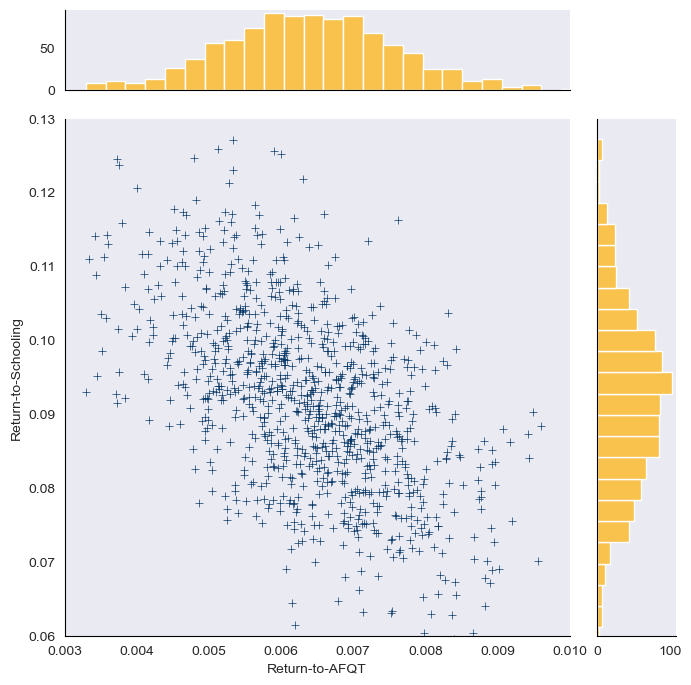

In [62]:
#-----------------------------------------------------------------------------#
#- Reverse Percentile Bootstrap                                              -#
#-----------------------------------------------------------------------------#

S = 1000                  # Number of posterior draws
M = np.empty((S,5))       # Matrix with posterior draws of statistics of interest
N = len(y) # Number of observations in dataset

# Compute OLS estimates using sample-in-hand
y = nlsy97['LogEarn']                       # Compue long OLS fit using bootstrap sample
X = sm.add_constant(nlsy97[['hgc_at_age28','asvab','black','hispanic']])
result = sm.OLS(y,X).fit()
beta_hat_HGC = result.params[1]
beta_hat_AFQT = result.params[2]

print("")
print(f"The OLS point estimate of the return-to-schooling is: {beta_hat_HGC:.3f}")

# Perform s=1,...,S bootstrap simulations    
for s in range (0,S):
    bth_sample = nlsy97.sample(n=N, replace=True)  # Take bth bootstrap sample
    y = bth_sample['LogEarn']                      # Compue OLS fit using bootstrap sample
    X = sm.add_constant(bth_sample[['hgc_at_age28','asvab','black','hispanic']]) 
    result = sm.WLS(y,X,weights=W).fit()
    M[s,:] = np.matrix(result.params) 
   
# Save Efron Bootstrap result in a dataframe
EB=pd.DataFrame({'Return-to-Schooling':M[:,1], 'Return-to-AFQT':M[:,2]})

print("")
print(EB.quantile([.025, .975]))

# Construct percentile and reverse percentile confidence intervals for return-to-schooling
lower_bnd = EB.quantile([.025, .975]).iloc[(0,0)]
upper_bnd = EB.quantile([.025, .975]).iloc[(1,0)]
print("")
print(f'A basic percentile boostrap confidence interval for the return-to-scholing is: {lower_bnd:.3f} to {upper_bnd:.3f}')

lower_bnd = 2*beta_hat_HGC - EB.quantile([.025, .975]).iloc[(1,0)]
upper_bnd = 2*beta_hat_HGC - EB.quantile([.025, .975]).iloc[(0,0)]
print("")
print(f'A reverse percentile boostrap confidence interval for the return-to-scholing is: {lower_bnd:.3f} to {upper_bnd:.3f}')

# Scatter (use seaborn add-on to matplotlib)
sns.set_style("dark", {'axes.linewidth': 2, 'axes.edgecolor':'black'})
sns.jointplot(x="Return-to-AFQT",y="Return-to-Schooling", data=EB, kind="scatter", \
              height=7, space=0.35, color="#003262", xlim=(0.003,0.010), ylim=(0.06,0.13), marker='+',
              marginal_ticks=True, marginal_kws=dict(bins=30, fill=True, color='#FDB515', linewidth=1))

# Save the figure
plt.savefig(graphics + 'Figure_Reverse Percentile_Bootstrap_Schooling_Returns.png', dpi=300, bbox_inches='tight')
plt.show()


       Return-to-Schooling  Return-to-AFQT
0.025             0.074493         0.00479
0.975             0.108489         0.00793

A 95% Bayesian bootstrap credible interval for the return-to-schooling is: 0.074 to 0.108



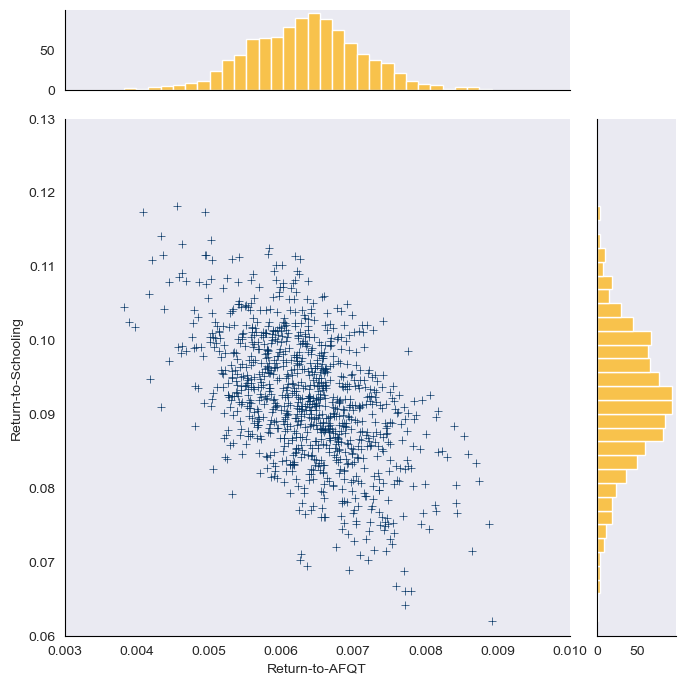

In [58]:
#-----------------------------------------------------------------------------#
#- Bayesian Bootstrap (cf., Chamberlain and Imbens (2003, JBES))             -#
#-----------------------------------------------------------------------------#

y = nlsy97['LogEarn']
X = sm.add_constant(nlsy97[['hgc_at_age28','asvab','black','hispanic']]) # "Permanently" add constant to design matrix

S = 1000                   # Number of posterior draws
M = np.empty((S,5))        # Matrix with posterior draws of statistics of interest
N = len(y) # Number of observations in dataset

for s in range (0,S):
    W = np.random.gamma(1.,1.,N) # Random draws of Gamma(1,1) variables
    W = W/np.sum(W)              # Converting draws to Dirichlet 
    
    result = sm.WLS(y,X,weights=W).fit()
    M[s,:] = np.matrix(result.params) # Linear regression with Dirichlet wgts
   
# Save Bayesian Bootstrap result in a dataframe
BB=pd.DataFrame({'Return-to-Schooling':M[:,1], 'Return-to-AFQT':M[:,2]})

print("")
print(BB.quantile([.025, .975]))

# Construct posterior credible interval for return-to-schooling
lower_bnd = BB.quantile([.025, .975]).iloc[(0,0)]
upper_bnd = BB.quantile([.025, .975]).iloc[(1,0)]
print("")
print(f'A 95% Bayesian bootstrap credible interval for the return-to-schooling is: {lower_bnd:.3f} to {upper_bnd:.3f}')
print("")

# Scatter (use seaborn add-on to matplotlib)
sns.set_style("dark", {'axes.linewidth': 2, 'axes.edgecolor':'black'})
sns.jointplot(x="Return-to-AFQT",y="Return-to-Schooling", data=BB, kind="scatter", \
              height=7, space=0.35, color="#003262", xlim=(0.003,0.010), ylim=(0.06,0.13), marker='+',
              marginal_ticks=True, marginal_kws=dict(bins=30, fill=True, color='#FDB515', linewidth=1))

# Save the figure
plt.savefig(graphics + 'Figure_Bayes_Bootstrap_Schooling_Returns_1of2.png', dpi=300, bbox_inches='tight')
plt.show()

In [59]:
#-----------------------------------------------------------------------------#
#- Bayesian Bootstrap (cf., Chamberlain and Imbens (2003, JBES))             -#
#-----------------------------------------------------------------------------#

y = nlsy97['LogEarn']
X = sm.add_constant(nlsy97[['hgc_at_age28','hgc_X_asvab','asvab','black','hispanic']]) # "Permanently" add constant to design matrix

S = 10000                  # Number of posterior draws
M = np.empty((S,101))      # Matrix with posterior draws of statistics of interest
N = len(y)                 # Number of observations in dataset

for s in range (0,S):
    W = np.random.gamma(1.,1.,N) # Random draws of Gamma(1,1) variables
    W = W/np.sum(W)              # Converting draws to Dirichlet 
    
    result = sm.WLS(y,X,weights=W).fit()
    M[s,:] = result.params['hgc_at_age28']+result.params['hgc_X_asvab']*(np.array(range(0,101)) - 50) # Linear regression with Dirichlet wgts
   


In [60]:
plq = np.quantile(M, 0.05, axis=0)
puq = np.quantile(M, 0.95, axis=0)
pm = np.mean(M, axis=0)

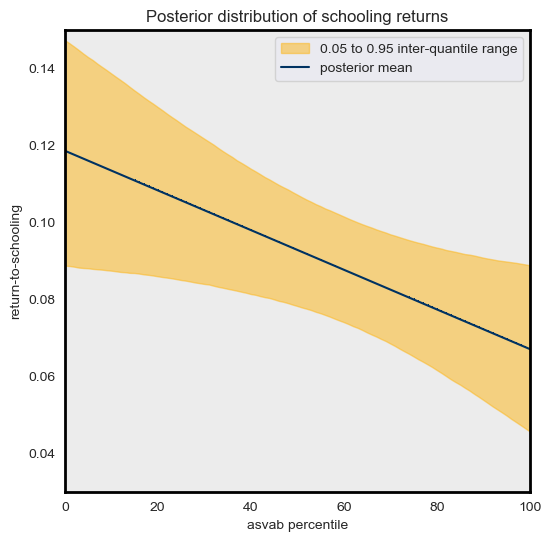

In [61]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

ax.fill_between(x=np.array(range(0,101)), y1=plq, y2=puq, color='#FDB515', alpha=0.5)
ax.plot(np.array(range(0,101)), pm, ',-', color="#003262")

ax.set_title('Posterior distribution of schooling returns')
ax.set_xlabel('asvab percentile')
ax.set_ylabel('return-to-schooling')

classes = ['0.05 to 0.95 inter-quantile range', 'posterior mean']
plt.legend(labels=classes)

plt.ylim([0.03,0.15])
plt.xlim([0,100])

# Clean up the plot, add frames etc.
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)  

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(2)
    
# Save the figure
plt.savefig(graphics + 'Figure_Bayes_Bootstrap_Schooling_Returns_2of2.png', dpi=300, bbox_inches='tight')
plt.show()